In [60]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("placement (1).csv")

In [65]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [66]:
df.shape

(200, 2)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


Text(0, 0.5, 'Package in LPA')

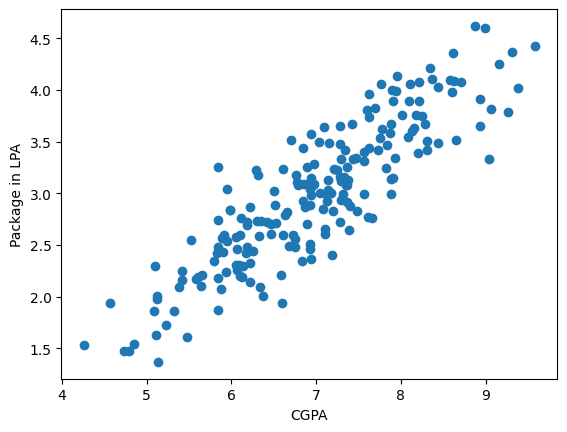

In [71]:
plt.scatter(df["cgpa"], df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")

In [77]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [79]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

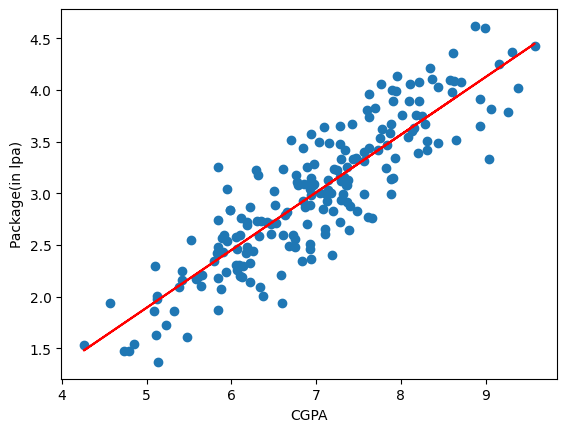

In [84]:
plt.scatter(df["cgpa"], df["package"])
plt.plot(X_train, lr.predict(X_train), color="red")
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [86]:
y_pred = lr.predict(X_test)

In [89]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [90]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [91]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [92]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [93]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [94]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [95]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [96]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.148937,3.26
1,5.12,0.847363,1.98
2,7.82,0.300543,3.25
3,7.42,0.262902,3.67
4,6.94,0.072457,3.57


Text(0, 0.5, 'Package(in lpa)')

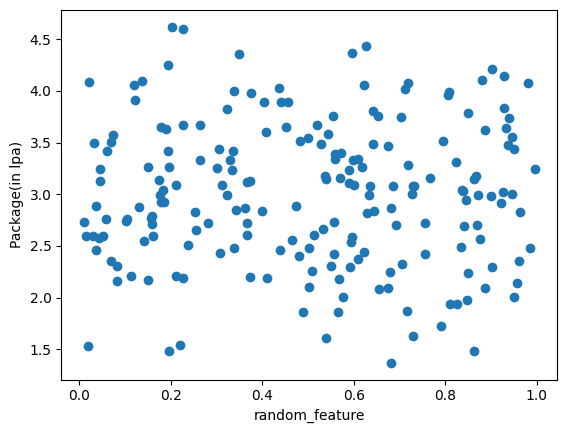

In [98]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [99]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [101]:
lr = LinearRegression()

In [102]:
lr.fit(X_train,y_train)

LinearRegression()

In [103]:
y_pred = lr.predict(X_test)

In [104]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7814797542199807


In [105]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7696678490426824

In [106]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [107]:
new_df2.sample(5)

,cgpa,iq,package
162,5.53,1.75,2.55
155,6.98,1.99,3.09
111,5.42,2.45,2.25
135,6.10,3.70,2.60
95,6.63,3.79,2.79


Text(0, 0.5, 'Package(in lpa)')

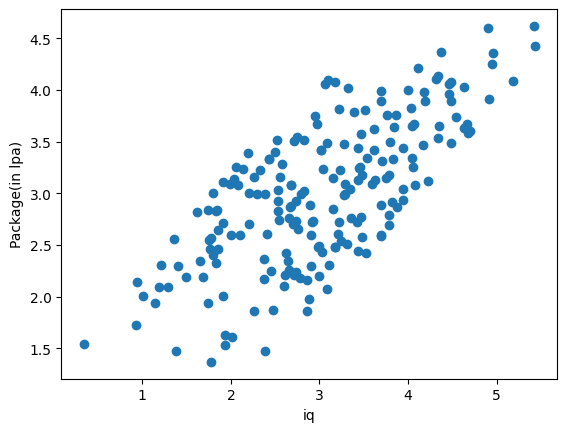

In [108]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [109]:
np.random.randint(-100,100)

-34

In [110]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [112]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [113]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8481270612187126


In [114]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8399177131764809